<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/Redes%20Neuronales/Redes_Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes *Feedforward*
Son redes donde la información circula en un único sentido (de izquierda a derecha)


## El algoritmo del perceptron
El algoritmo Perceptron fue publicado en 1957 por Frank Rosenblatt. El objetivo del Perceptron es encontrar un hiperplano capaz de separar correctamente un conjunto de datos que sean linealmente separables, una vez obtenido el hiperplano, este puede utilizarse para clasificaciones binarias.
Aunque el Perceptron es un algoritmo de aprendizaje muy simple, entender su funcionamiento es clave para aprender otros métodos más complejos como las máquinas de vector soporte SVM o las redes neuronales artificiales.

Antes de describir en detalle el algoritmo, conviene conocer una serie de términos matemáticos: el producto escalar o dot product, el concepto de hiperplano y el concepto de linealmente separable.

### Producto escalar o **dot product**
El producto escalar o *dot product* es una operación entre dos vectores (de la misma dimensión) que devuelve un único valor (escalar) con información sobre la relación entre ambos vectores. Existen dos formas de interpretar el dot product: geométrica y algebraica.


#### Interpretación Geométrica
Geométricamente, el dot product se define como el producto entre la magnitud euclídea (módulo o segunda norma) de dos vectores y el coseno del ángulo que forman. Supóngase dos vectores x e y que forman un ángulo $\alpha$ entre ellos. Su dot product es:
<p><span class="math display">\[\textbf{x} \cdot \textbf{y} = ||\textbf{x}|| \ ||\textbf{y}|| \ cos(\alpha)\]</span></p>
El *dot product* está por lo tanto influenciado por el ángulo que forman los dos vectores:
<ul>
<li><p>Si <span class="math inline">\(\alpha = 0\)</span>, <span class="math inline">\(cos(\alpha) = 1\)</span> y <span class="math inline">\(\textbf{x} \cdot \textbf{y} = ||\textbf{x}|| \ ||\textbf{y}||\)</span>. Esto significa que, si los dos vectores tienen exactamente la misma dirección, <em>el dot product</em> equivale a la multiplicación de sus magnitudes.</p></li>
<li><p>Si <span class="math inline">\(\alpha = 90\)</span>, <span class="math inline">\(cos(\alpha) = 0\)</span> y <span class="math inline">\(\textbf{x} \cdot \textbf{y} = 0\)</span>. Esto significa que, si los dos vectores son perpendiculares, <em>el dot product</em> es cero. Los dos vectores tienen cero relación.</p></li>
<li><p>Si <span class="math inline">\(\alpha = 180\)</span>, <span class="math inline">\(cos(\alpha) = -1\)</span> y <span class="math inline">\(\textbf{x} \cdot \textbf{y} = -||\textbf{x}|| \ ||\textbf{y}||\)</span>. Esto significa que, si los dos vectores tienen direcciones opuestas, <em>el dot product</em> equivale al valor negativo de la multiplicación de sus magnitudes.</p></li>
</ul>

#### Interpretación algebraica 
<p>El <em>dot product</em> se define, desde el punto de vista del álgebra, como el sumatorio del producto de cada una de sus dimensiones.</p>
$$\textbf{x} \cdot \textbf{y} = \textbf{x}_1\textbf{y}_1 + \textbf{x}_2\textbf{y}_2$$ 
o de forma genérica:
$$\textbf{x} \cdot \textbf{y} = \sum^n_{i = 1}\textbf{x}_i\textbf{y}_i$$
<p>Con esta definición, no es necesario conocer el ángulo que forman los dos vectores.</p>


<h2>Linealmente separable</h2>
<p><br></p>
<p>El concepto de separación lineal se entiende fácilmente cuando se estudia en espacios de 2 o 3 dimensiones. En 2 dimensiones, que dos grupos de observaciones sean linealmente separables significa que existe al menos una recta que permite separar perfectamente los dos grupos. En el caso de 3 dimensiones, los datos son linealmente separables si existe un plano tal, que es capaz de separar perfectamente los grupos. Este mismo concepto puede generalizarse para cualquier número de dimensiones, la condición sigue siendo la misma, que exista un elemento de una dimensión menor que separe los grupos. Ha este elemento se le conoce como hiperplano. <br><br></p>
</div>
<div id="hiperplano" class="section level2">
<h2>Hiperplano</h2>
<p><br></p>
<p>En geometría, un hiperplano se define como un subespacio con una dimensión menos que el espacio que lo rodea. Esta definición es poco intuitiva, pero se entiende bien si se analiza un ejemplo en dos dimensiones.</p>
<p>En un espacio de 2 dimensiones, un hiperplano tiene <em>2-1</em> dimensiones, es decir, una recta. La ecuación que se emplea con más frecuencia en cálculo para definir una recta es:</p>
$$y = ax + b$$
<p>o de forma equivalente:</p>
<p><span class="math display">\[y - ax - b = 0\]</span></p>
<p>Otra forma de definir una recta es mediante el <em>dot product</em> de dos vectores. Supóngase los vectores <span class="math inline">\(\textbf{x} = (x, y)\)</span> y <span class="math inline">\(\textbf{w} = (w_1, w_2)\)</span>, y la constante <span class="math inline">\(b\)</span>, con ellos puede definirse una recta de la siguiente forma:</p>
<p><span class="math display">\[\textbf{x} \cdot \textbf{w} + b = 0\]</span> <span class="math display">\[(x, y) \cdot (w_1, w_2) + b = 0\]</span> <span class="math display">\[(xw_1 + yw_2) + b = 0\]</span> <span class="math display">\[y = -\frac{w_1}{w_2}x - \frac{b}{w_2}\]</span> Si se define <span class="math inline">\(a\)</span> y <span class="math inline">\(b\)</span> como:</p>
<p><span class="math display">\[a = -\frac{w_1}{w_2} \ \ \ y \ \ \ c = -\frac{b}{w_2}\]</span></p>
<p>Se obtiene la ecuación de una recta:</p>
<p><span class="math display">\[y = ax + c\]</span></p>
<p>La ventaja de definir una recta empleando vectores es que puede generalizarse para cualquier número de dimensiones. De hecho, esta es la forma con la que se obtiene la ecuación de un hiperplano en cualquier dimensión. <br><br></p>
</div>

<h2>Clasificación binaria mediante un hiperplano</h2>
<p><br></p>
<p>Tal y como se ha definido previamente, un hiperplano de dimensión <span class="math inline">\(n\)</span> divide un espacio de dimensión <span class="math inline">\(n + 1\)</span> en dos partes. Esto significa que puede emplearse a modo de clasificador binario. Las observaciones que queden por encima del hiperplano pertenecen a una clase y las que quedan por debajo a la otra. En un espacio de dos dimensiones, cada observación <span class="math inline">\(i\)</span> esta definida por un vector <span class="math inline">\(\textbf{x}_i\)</span> y una variable respuesta <span class="math inline">\(y\)</span> que puede tomar dos valores (<em>1, 0</em>). Dado un hiperplano definido por el vector <span class="math inline">\(\textbf{w}\)</span> y la constante <span class="math inline">\(b\)</span>, para clasificar las observaciones, se busca una función <span class="math inline">\(h\)</span> tal que:</p>

<p><span class="math display">
  $$
\begin{array}{cc}  
  h(\textbf{x}_i) = 
  \begin{cases}
    1       &; \quad \text{if } \ \textbf{w} \cdot \textbf{x} + b \geq 0\\
    0  &; \quad \text{if } \textbf{w} \cdot \textbf{x} + b \gt; 0
  \end{cases}
\end{array} $$
</span></p>
<p>lo que es equivalente a:</p>
<p><span class="math display">\[h(\textbf{x}_i) = sign(\textbf{w} \cdot \textbf{x} + b)\]</span></p>
<p>La ecuación de la función <span class="math inline">\(h\)</span> puede simplificarse excluyendo el término <span class="math inline">\(b\)</span>. Para ello, se añade, a todos los vectores <span class="math inline">\(\textbf{x}_i\)</span>, el valor 1 en la primera posición y, al vector del hiperplano <span class="math inline">\(\textbf{w}\)</span> el valor de <span class="math inline">\(b\)</span>. Aunque el resultado final es el mismo, suele ser más sencillo trabajar de esta forma a la hora de implementar los algoritmos. A los vectores modificados con este fin se les conoce como vectores aumentados. <br><br></p>

###Algoritmo perceptrón
<p>Tal como se ha descrito hasta ahora, independientemente de la dimensión, se puede crear un clasificador binario (siempre que los datos sean linealmente separables) mediante un hiperplano, pero, ¿Cómo se encuentra dicho hiperplano?.\
Es aquí donde entra en juego el algoritmo del <em>Perceptron</em>. Dado un set de datos con <em>m</em> observaciones <em>n</em>-dimensionales 
(<span class="math inline">$\textbf{x}_i$</span>, <span class="math inline">\(y_i\)</span>),
 el <em>Perceptron</em> trata de encontrar la función <span class="math inline">\(h\)</span> capaz de predecir correctamente la clase <span class="math inline">\(y_i\)</span> para cada <span class="math inline">\(\textbf{x}_i\)</span>. La función <span class="math inline">\(h\)</span> empleada por el <em>Perceptron</em> es <span class="math inline">\(h(\textbf{x}_i) = sign(\textbf{w} \cdot \textbf{x})\)</span>, donde <span class="math inline">\(\textbf{w} \cdot \textbf{x}\)</span> no es más que la ecuación de un hiperplano definida por dos vectores aumentados, de los cuales, el único desconocido es <span class="math inline">\(\textbf{w}\)</span>. Por lo tanto, el objetivo del <em>Perceptron</em> es encontrar el vector <span class="math inline">\(\textbf{w}\)</span> que permite separar perfectamente las observaciones.</p>
<p>La forma en que el algoritmo <em>Perceptron</em> encuentra el hiperplano óptimo es la siguiente:</p>
<hr />
<ol style="list-style-type: decimal">
<li><p>Iniciar el proceso con un hiperplano aleatorio definido por el vector aleatorio <span class="math inline">\(\textbf{w}\)</span>.</p></li>
<li><p>Clasificar todas las observaciones acorde al hiperplano <span class="math inline">\(\textbf{w}\)</span>.</p></li>
<li><p>De entre las observaciones mal clasificadas, seleccionar una de forma aleatoria (<span class="math inline">\(i\)</span>) y con ella actualizar el hiperplano:</p></li>
</ol>
<p><span class="math display">\[\textbf{w} = \textbf{w} + \textbf{x}_i  * y_i\]</span></p>
<ol start="4" style="list-style-type: decimal">
<li>Repetir los pasos 2 y 3 hasta que todas las observaciones estén bien clasificadas.</li>
</ol>


#### Ejemplo

Esta tabla contiene 4 variables que describen la flor y la clasifican en 3 clases. Tomaremos los últimos 50 registros de la tabla que pertenece a la clase 'Iris-Virginica' y usaremos solo 2 clases 'Iris-setosa' e 'Iris-versicolor' veremos que estas clases son linealmente separables.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

In [ ]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

Implementaremos el algoritmo mencionado previamente y veremos como funciona.
Tenemos 4 variables y entonces 4 pesos asociados a ellos, además se agrega el término escalar $b$, por lo que son 5 pesos en la ecuación.
Definiremos 10 iteraciones, para cada iteración se calcula 0 o 1 para todos los puntos de datso y se actualizan los pesos con cada clasificación errónea.

Si en la muestra es mal clasificada, entonces los pesos se actualizan por un delta que cambia la dirección, entonces si la muestra es clasificada otra vez, los resultados son menos erróneos. 

Se clasificará cualquier etiqueta menor que cero como '0' (Iris-Setosa) y lo demás como '1' (Iris-versicolor).


In [ ]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

Ahora clasificaremos los errores en cada iteración, el algoritmo converge en la cuarta iteración. 

*Una propiedad del Percetprón es que si los datos son linealmente separables entonces el algoritmo garantiza converger en algún punto.*


In [ ]:

epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

<p>Es interesante tener en cuenta dos propiedades de este algoritmo:</p>
<ul>
<li><p>En cada actualización del hiperplano, se modifica el vector <span class="math inline">$\textbf{w}$</span> intentando que clasifique bien una de las observaciones mal clasificadas (seleccionada aleatoriamente) pero sin tener en cuenta el resto. Esto significa que, una determinada actualización, puede hacer que se consiga clasificar bien la observación en cuestión pero que otra u otras que estaban bien clasificadas pasen a estar mal. Afortunadamente, los matemáticos han demostrado que el algoritmo del <em>Perceptron</em> siempre acaba encontrando un hiperplano de separación (siempre y cuando los datos sean linealmente separables).</p></li>
<li><p>Como puede intuirse observando la imagen anterior, existen infinitos hiperplanos que consiguen separar las clases, cuando estas son linealmente separables. Dada la selección aleatoria de observaciones en el paso de actualización, el algoritmo genera diferentes hiperplanos cada vez que se ejecuta.</p></li>
<li><p>Si bien el <em>Perceptron</em> siempre encuentra un hiperplano que separa perfectamente las clases (siempre y cuando sean linealmente separables), no tiene por qué ser el hiperplano óptimo, entendiendo por hiperplano óptimo aquel que separa correctamente las observaciones y que además se encuentra en el punto medio entre ambas clases. <br><br></p></li>
</ul>

### Algunas funciones importantes para evaluar una red neuronal


**Función Objectivo**: Mide qué tan bien la salida del modelo se acerca a la salida real. La función objetivo tiene dos tipos, función de pérdida (*Loss Function*) que se usa en aprendizaje supervisado y *reward function* utilizada en **reinforcement learning**

**Algunas Funciones de pérdida**:

*   Clasificación: $-\sum_{i=1}^n{y_iln\hat{y}_i}$ **Cross Entropy**
*   Regresión: $\sum_{i=1}^n{(y_i-\hat{y_i})^2}$ **$L_2$-norm**

**Gradient Descent**: Es el algoritmo de optimización más conocido. EL objetivo es encontrar el valor mínimo de una función aplicando la regla $x_{i+1}=x_i-\eta f'(x_i)$, donde $\eta$ es un número positivo pequeño conocido como  *learning rate* y $f(x)$ es la función de pérdida.

Las variables que varían mientras se encuentra el valor mínimo son los pesos y los *biases*. Para esto, las reglas de acuatlización son:

$w_{i+1}=w_i - \eta\nabla_wL(w_i)=w_1-\eta\sum_{i=1}^n{x_i\delta_i}$

$b_{i+1}=b_i- \eta\nabla_bL(b_i)=b_1-\eta\sum_{i=1}^n{x_i\delta_i}$

### Propagación
Las redes neuronales tienen dos tipos de propagación, hacia adelante (*forward propagation*) y hacia atrás (*back propagation*). 

La propagación hacia adelante es la encargada de pasar las variables de entrada a la salida mediante la función de activación. Al final de cada época, los valores obtenidos se comparan con los valores reales.

La propagación hacia atrás de los errores se hace mediante el gradiente descendente (u otro método de optimización). Se propaga el error por toda la red y se actualizan los parámetros. 


Propagación hacia adelante
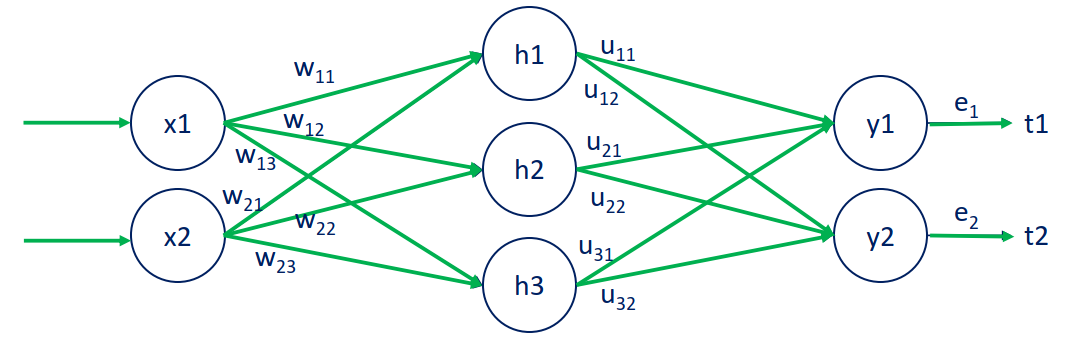

Propagación hacia atrás
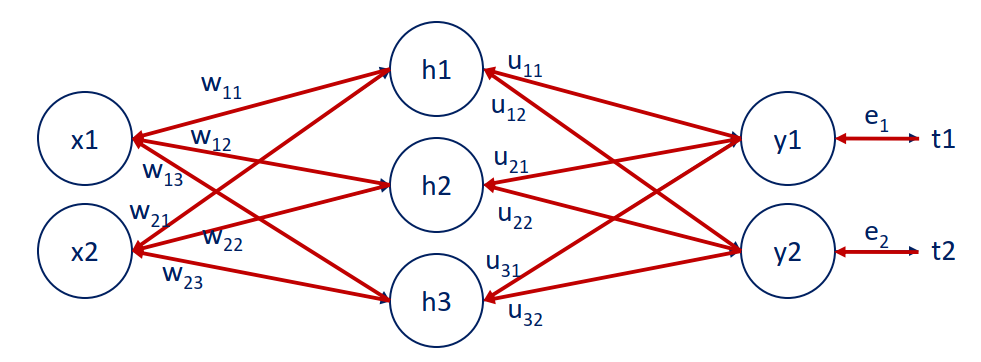

## Método de *Backpropagation*
Al hacer *backpropagtion* es donde el algoritmo ¡itera para aprender! Esta vez iremos de “derecha a izquierda” en la red para  mejorar la precisión de las predicciones. El algoritmo de backpropagation se divide en dos Fases: 

**Un enfoque para calcular la salida de una Red Neuronal**

Antes de analizar en profundidad backpropagation, hagamos un calentamiento con un algoritmo rápido basado en matriz para calcular la salida de una red neuronal. De hecho, ya vimos brevemente este algoritmo cerca del final del anterior capítulo, pero se describió rápidamente, por lo que vale la pena revisarlo en detalle. En particular, esta es una buena manera de sentirse cómodo con la notación utilizada en backpropagation, en un contexto familiar. Comencemos con una notación que nos permite referirnos a los pesos en la red de una manera no ambigua. Usaremos $w^l_{jk}$   para denotar el peso de la conexión de la neurona k-ésima en la capa a la neurona $j$ en la capa $l$.


Entonces, por ejemplo, el siguiente diagrama muestra el peso en una conexión desde la cuarta neurona en la segunda capa a la segunda neurona en la tercera capa de una red:

<img loading="lazy" width="475" height="186" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/figure1_backprop.png?resize=475%2C186" alt=" Introducción a la notación de índices de los pesos de una red neuronal. " class="wp-image-48858 jetpack-lazy-image jetpack-lazy-image--handled" data-recalc-dims="1" data-lazy-loaded="1">


Utilizamos una notación similar para los sesgos y activaciones de la red. Explícitamente, usamos $b_j^l$ para el sesgo de la neurona j-ésima en la capa l-ésima. Y usamos $a_j^l$ para la activación de la neurona j-ésima en la capa l-ésima. El siguiente diagrama muestra ejemplos de estas anotaciones en uso:

<img loading="lazy" width="193" height="161" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/figure2_backprop.png?resize=193%2C161" alt="Ejemplo de notación" class="wp-image-48859 jetpack-lazy-image jetpack-lazy-image--handled" data-recalc-dims="1" data-lazy-loaded="1">

Con estas notaciones, la activación $a^l$ de la neurona $j$-ésima en la capa $l$-ésima está relacionada con las activaciones en la capa $(l-1)$-ésima por la ecuación:
$$a_j^l=\sigma(\Sigma_k w_{jk}^l a_k^{l-1}+b_j^l )$$

donde la suma está sobre todas las neuronas $k$ en la capa $(l-1)$. Para reescribir esta expresión en forma de matriz, definimos una matriz de peso $w^l$ para cada capa $l$. Las entradas de la matriz de peso $w^l$ son sólo los pesos que se conectan a la l-ésima capa de neuronas, es decir, la entrada en la fila $j$ y la columna $k$ es $w^l$. Del mismo modo, para cada capa $l$ definimos un vector de bias, $b^l$. Probablemente pueda adivinar cómo funciona esto: los componentes del vector de sesgo son solo los valores $b^l$, un componente para cada neurona en la capa $l$-ésima. Y finalmente, definimos un vector de activación $a^l$ cuyos componentes son las activaciones $a_j^l$. El último ingrediente que necesitamos para reescribir la fórmula anterior en forma de matriz es la idea de vectorizar una función como $\sigma$. Queremos aplicar una función como $\sigma$ a cada elemento en un vector $v$ . Utilizamos la notación obvia $\sigma(v)$ para denotar este tipo de aplicación de elementos de una función. Es decir, los componentes de $\sigma(v)$ son solo $\sigma(v)_j  = \sigma(v_j)$. Como ejemplo, si tenemos la función $f(x) = x^2$, entonces la forma vectorizada de $f$ tiene el efecto:
$$f\left( \begin{bmatrix} 2 \\ 3 \end{bmatrix}\right) =   \begin{bmatrix} f(2) \\ f(3) \end{bmatrix} =   \begin{bmatrix} 4 \\ 9 \end{bmatrix}  $$
Podemos, con esta notación en mente, escribir la ecuación que nos interesa como:
$$a^l=\sigma(w^l a^{l-1}+b^l )$$
Esta expresión nos da una forma mucho más global de pensar acerca de cómo las activaciones en una capa se relacionan con las activaciones en la capa anterior: simplemente aplicamos la matriz de peso a las activaciones, luego agregamos el vector de polarización y finalmente aplicamos la función $\sigma$. Esa visión global a menudo es más fácil y más sucinta (¡e implica menos índices!) que la visión de neurona por neurona que hemos visto ahora. Piense en ello como una forma de escapar del infierno del índice, sin dejar de ser preciso sobre lo que está sucediendo.


**Las dos suposiciones que tenemos que realizar sobre la función de coste**
El objetivo de backpropagation es calcular las derivadas parciales $\frac{ \partial C}{ \partial w }  y \frac{ \partial C}{ \partial b } $ de la función de coste C con respecto a cualquier peso w o sesgo b en la red.
Para que backpropagation funcione, debemos hacer dos suposiciones principales sobre la forma de la función de coste. Sin embargo, antes de exponer esas suposiciones, es útil tener en mente una función de coste de ejemplo. Utilizaremos la función de coste cuadrática:

$$C(w, b) = \frac{1}{2n}\Sigma_x  \parallel y(x) -a^L(x) \parallel ^2$$
$w$ denota la colección de todos los pesos en la red, \
$b$ todos los sesgos, \
$n$ es el número total de entradas de entrenamiento, \
$a^L$ es el vector de salidas de la red cuando se ingresa $x$, \
y la suma es sobre todas las entradas de entrenamiento, $x$. \
$L$ es el número de capas que tiene nuestra red neuronal.

Bien, entonces, 
**¿qué suposiciones debemos hacer sobre nuestra función de coste, C para poder aplicar backpropagation?**

La primera suposición que necesitamos es que la función de coste puede escribirse como un promedio $$C=\frac{1}{n} \Sigma_x C_x$$ sobre las funciones de coste $C_x$ para un ejemplo de entrenamiento individual. 

Este es el caso de la función de coste cuadrático, donde el coste de un solo ejemplo de entrenamiento es $C_x=1/2$   $\parallel y-a^L  \parallel  ^2$. 

Este supuesto también será válido para todas las demás funciones de coste que encontraremos.

La razón por la que necesitamos esta suposición es porque lo que backpropagation realmente nos permite hacer es calcular las derivadas parciales $\frac{ \partial C_x}{ \partial w } $ y $\frac{ \partial C_x}{ \partial b }$  para un solo ejemplo de entrenamiento. 

Luego recuperamos $\frac{ \partial C}{ \partial w }$  y $\frac{ \partial C}{ \partial b }$  promediando los ejemplos de entrenamiento. De hecho, con esta suposición en mente, supondremos que el ejemplo de entrenamiento $x$ ha sido arreglado, y eliminaremos el subíndice $x$, escribiendo el coste $C_x$ como $C$. 

Eventualmente volveremos a colocar la $x$, pero por ahora es una notación molesta que es mejor dejar implícita. \


La segunda suposición que hacemos sobre el coste es que se puede escribir en función de los resultados de la red neuronal:

<img loading="lazy" width="315" height="139" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/figure3_backprop.png?resize=315%2C139" alt="Construcción de la función de coste como función del output de una red neuronal." class="wp-image-48860 jetpack-lazy-image jetpack-lazy-image--handled" data-recalc-dims="1" data-lazy-loaded="1">

Por ejemplo, la función de costo cuadrático cumple este requisito, ya que el coste cuadrático para un solo ejemplo de entrenamiento  $x$ puede escribirse como:

$$C_x = \frac{1}{2} \parallel y -a^L(x) \parallel ^2 =  \frac{1}{2} \Sigma_j ( y_j -a_j^L)$$

y por lo tanto es una función de las activaciones de salida. Por supuesto, esta función de costo también depende de la producción deseada $y$, y puede que se pregunte por qué no consideramos el coste también en función de $y$. Sin embargo, recuerde que el ejemplo de entrenamiento de entrada $x$ es fijo, por lo que la salida y también es un parámetro fijo. En particular, no es algo que podamos modificar cambiando los pesos y los sesgos de ninguna manera, es decir, no es algo que la red neuronal aprenda. Por lo tanto, tiene sentido considerar $C$ como una función de las activaciones de salida $a^L$ sólo, con y simplemente un parámetro que ayuda a definir esa función.



**Cuatro ecuaciones fundamentales de backpropagation** 

*Backpropagation* se trata de comprender cómo el cambio de los pesos y sesgos en una red impacta en la función de coste. En definitiva, esto significa calcular las derivadas parciales:

 $$\frac{\partial C}{\partial w_{jk}^l }\textrm{  y  }\frac{\partial C}{ \partial b_j^l}$$
 
 Pero para calcularlos, primero introducimos una cantidad intermedia, $\delta_j^l$, que podemos llamar el error en la $j$-ésima neurona de la capa $l$-ésima. Backpropagation nos dará un procedimiento para calcular el error $\delta_j^l$, y luego relacionarlo con $\frac{\partial C}{\partial w_{jk}^l }$ y $\frac{\partial C}{ \partial b_j^l}$ .

Para comprender cómo se define el error, imaginemos que hay un demonio en nuestra red neuronal:

<img loading="lazy" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/image-3.png?resize=383%2C157" alt="Figura 1: Red neuronal con demonio." class="wp-image-49144 jetpack-lazy-image jetpack-lazy-image--handled" width="383" height="157" data-recalc-dims="1" data-lazy-loaded="1">

El demonio se sienta en la $j$-ésima neurona en la capa $l$. A medida que entra la entrada a la neurona, el demonio juega con la operación de la neurona. Agrega un pequeño cambio $\Delta z_j^l$ a la ponderación del input de la neurona, de modo que en lugar de generar $\sigma(z_j^l )$ la neurona produce $\sigma(z_j^l+\Delta z_j^l)$.

El cambio se propaga a través de las capas posteriores de la red, lo que finalmente causa que la función de coste cambie en una cantidad $$\frac{\partial C}{ \partial z_j^l} \Delta z_j^l$$
Pero este demonio es un buen demonio y está tratando de ayudarnos a mejorar el coste, es decir, están tratando de encontrar un $\delta z_j^l$ que lo reduzca. 

Suponga que $\frac{\partial C}{ \partial z_j^l}$ tiene un valor grande (ya sea positivo o negativo). Entonces el demonio puede reducir el costo bastante eligiendo $\Delta z_j^l$ para tener el signo opuesto a $\frac{\partial C}{ \partial z_j^l} \Delta z_j^l $.

Por el contrario, si $\frac{\partial C}{ \partial z_j^l} \Delta z_j^l$  está cerca de cero, entonces el demonio no puede mejorar mucho la función de coste tocando $z_j^l$, por lo que tendrá a la neurona muy cerca del punto de equilibrio. 

Podemos entonces decir que $\frac{\partial C}{ \partial z_j^l} \Delta z_j^l$  es una medida del error en la neurona.

Motivados por esta historia, definimos el error $\delta_j^l$ de la neurona $j$ en la capa $l$ por:
$$\delta_j^l = \frac{\partial C}{\partial z_j^l}$$

Backpropagation se basa en cuatro ecuaciones fundamentales. Juntas, esas ecuaciones nos dan una manera de calcular tanto el error $\delta_j^l$ como el gradiente de la función de coste. 
A continuación, se declaran las cuatro ecuaciones:

*Tengamos cuidado: no debemos esperar asimilar instantáneamente las ecuaciones. Tal expectativa conducirá a la decepción. De hecho, las ecuaciones de retropropagación son algo complejas, por lo que comprenderlas bien requiere tiempo y paciencia. La buena noticia es que esa paciencia se paga muchas veces. Por lo tanto, la discusión en esta parte es simplemente un comienzo, ayudándole en el camino hacia una comprensión profunda de las ecuaciones.*

* a. **BP1: Una ecuación del error en la capa de salida, $\delta^L$.
$$\delta_j^l =  \frac{\partial C}{\partial a_j^L}\sigma'(z-j^L) $$**

Esta es una expresión muy natural. El primer término a la derecha, $\frac{\partial C}{ \partial a_j^l}$, solo mide cómo de rápido está cambiando el coste en función de la activación de salida $j$-ésima. Si, por ejemplo, $C$ no depende mucho de una neurona de salida particular, $j$, entonces $\delta_j^L$ será pequeño, que es lo que podemos esperar. El segundo término a la derecha, $\sigma' (z_j^L )$, mide cómo de rápido la función de activación $\sigma$ está cambiando en $z_j^L$.

Tenga en cuenta que todo en la ecuación BP1 se calcula fácilmente. En particular, calculamos $z_j^L$ mientras calculamos el comportamiento de la red, y sólo es una pequeña sobrecarga adicional para calcular $\sigma' (z_j^L )$. La forma exacta de $\frac{\partial C}{ \partial a_j^l}$, por supuesto, dependerá de la forma de la función de coste. Sin embargo, siempre que se conozca la función de coste, debería haber pocos problemas de cálculo y entonces $\frac{\partial C}{ \partial a_j^l}= (a_j^L-y_j)$, que obviamente es fácilmente computable.

La ecuación BP1 es una expresión componente para $\delta_j^L$. Es una expresión perfectamente buena, pero no la forma basada en matriz que queremos para la propagación hacia atrás. Sin embargo, es fácil reescribir la ecuación en forma matricial, como:
$$\delta^L=\nabla_a C \odot \sigma'(z^L)$$

Puede pensar que $\nabla_a C$ expresa la tasa de cambio de $C$ con respecto a las activaciones de salida. Es fácil ver que la ecuación anterior y BP1 son equivalentes, y por esa razón a partir de ahora usaremos BP1 indistintamente para referirnos a ambas ecuaciones. Como ejemplo, en el caso del costo cuadrático tenemos $\nabla_a C=(a_j^L-y_j)$, por lo que la forma completamente basada en matriz de BP1 se convierte en:

$$\delta^L = (a_j^L-y_j) \odot \sigma'(z^L)$$

* b. **BP2: Una ecuación del error $\delta^l$ en términos del error de la siguiente capa, $\delta^{(l+1)}$.**
$$\delta^l = ( (w^{l+1} )^T \delta^{l+1}) \odot \sigma'(z^L)$$

donde $(w^{l+1} )^T$ es la transposición de la matriz de peso $w^{l+1}$ para la capa $(l + 1)$. Esta ecuación parece complicada, pero cada elemento tiene una buena interpretación. Supongamos que conocemos el error $\delta^{l+1}$ en la capa $(l + 1)$. Cuando aplicamos la matriz de peso de transposición, $(w^{l+1} )^T$, podemos pensar intuitivamente en esto como mover el error hacia atrás a través de la red, dándonos algún tipo de medida del error en la salida de la capa $l$-ésima. Luego tomamos el producto Hadamard $\odot  \sigma' (z^l )$. Esto mueve el error hacia atrás a través de la función de activación en la capa $l$, dándonos el error $\delta^l$ en la entrada ponderada a la capa $l$.
Combinando BP1 y BP2 tenemos el error $\delta^l$ de cualquier capa de la red. Empezamos usando BP1 para calcular el error $\delta^L$ y aplicando BP2 las $n$ veces que deseemos llegaremos a calcular el error $\delta^{L-n}$. 

* c. **BP3: Una ecuación para calcula la tasa de cambio del coste con respecto a cualquier sesgo de la red,
$$\delta_j^l = \frac{\partial C}{\partial b_j^l}$$**

Es decir, el error $\delta_j^l$ es exactamente a la tasa de cambio $\frac{\partial C}{ \partial b_j^l}$. Esta es una gran noticia, ya que BP1 y BP2 ya nos han dicho cómo calcular $\delta_j^l$. Podemos reescribir BP3 en forma abreviada como:

$$\delta = \frac{\partial C}{\partial b}$$

* d. **BP4: una ecuación para la tasa de cambio de la función de coste con respecto a cualquier peso en la red,
$$\frac{\partial C}{\partial w_{jk}^l}=(a_k^{l-1} - \delta_j^l)$$**

Esto nos dice cómo calcular las derivadas parciales $\frac{\partial C}{ \partial w_{jk}^l}$ en términos de las cantidades $\delta^l y a^{l-1}$, que ya sabemos cómo calcular. La ecuación se puede reescribir en una notación menos pesada como índice:

$$\frac{\partial C}{\partial w}=a_{in}\delta_{out}$$

donde se entiende que $a_{in}$ es la activación de la entrada de neuronas al peso $w$, y $\delta_{out}$ es el error de la salida de neuronas del peso $w$. Al acercarnos para ver sólo el peso $w$, y las dos neuronas conectadas por ese peso, podemos representar esto como:


<img loading="lazy" width="158" height="67" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/image-4.png?resize=158%2C67" alt="Dos neuronas conectadas por ese peso" class="wp-image-49152 jetpack-lazy-image jetpack-lazy-image--handled" data-recalc-dims="1" data-lazy-loaded="1">

Una buena consecuencia de la ecuación anterior es que cuando la activación $a_{in}$ es pequeña, $a_{in}\sim 0$, el término de gradiente $\frac{\partial C}{\partial w}$ también tenderá a ser pequeño. En este caso, diremos que el peso aprende lentamente, lo que significa que no cambiará mucho durante el descenso del gradiente. En otras palabras, una consecuencia de **BP4** es que los pesos que salen de las neuronas de baja activación aprenden lentamente.

Hay otras ideas a lo largo de estas líneas que se pueden obtener de **BP1 – BP4**. 

Comencemos mirando la capa de salida. Considere el término $\sigma'(z_j^L)$ en BP1. Recordemos de la gráfica de la función sigmoide que la función $\sigma$ se vuelve muy plana cuando $\sigma' (z_j^L)$ es aproximadamente 0 o 1. Cuando esto ocurra tendremos $\sigma' (z_j^L )\sim 0$. Y así la lección es que un peso en la capa final aprenderá lentamente si la neurona de salida es de baja activación ($\sim 0$) o alta activación ($\sim 1$). En este caso, es común decir que la neurona de salida se ha saturado y, como resultado, el peso ha dejado de aprender (o está aprendiendo lentamente). Observaciones similares también son válidas para los sesgos de la neurona de salida.


Podemos obtener información similar para las capas anteriores. En particular, tenga en cuenta el término $\sigma' (z_j^L)$ en **BP2**. Esto significa que es probable que $\delta^l$ se vuelva pequeño si la neurona está cerca de la saturación. Y esto, a su vez, significa que cualquier entrada de peso a una neurona saturada aprenderá lentamente.


**En resumen**

Hemos aprendido que un peso aprenderá lentamente si la neurona de entrada tiene baja activación o si la neurona de salida se ha saturado, es decir, tiene alta o baja activación. Ninguna de estas observaciones es demasiado sorprendente. Aun así, ayudan a mejorar nuestro modelo mental de lo que está sucediendo a medida que una red neuronal aprende.

<img loading="lazy" width="363" height="201" src="https://empresas.blogthinkbig.com/wp-content/uploads/2019/10/image-5.png?resize=363%2C201" alt="Resumen de las ecuaciones de backpropagation" class="wp-image-49154 jetpack-lazy-image jetpack-lazy-image--handled" data-recalc-dims="1" data-lazy-loaded="1">


**Descripción breve del algoritmo para calcular el gradiente de la función de costo**

Las ecuaciones de *backpropagation* o propagación hacia atrás proveen una manera de calcular el gradiente de la función de costo. Veamos el algoritmo:

1. **Entrada $x$:** Definir la activación correspondiente $a^1$ para la capa de entrada.
2. **Feedforward:** Para cada $l=2,3,\ldots,L$ calcular $z^{l} = w^l a^{l-1}+b^l$ y $a^l=\sigma(z^l)$.
3. **Salida del error:** Calcular el vector $\delta^L = \nabla_a C \odot \sigma'(z^L)$ 
4. **Propagar hacia atrás el error:** Para cada $l=L-1, L-2,\ldots,2$ calcular  $\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot   \sigma'(z^{l})$.
5. **Salida:** El gradiente de la función de costo está dado por:
$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$ y $\frac{\partial C}{\partial b^l_j} = \delta^l_j$

Examinando el algoritmo podemos ver por qué es llamado *backpropagation". Se calcula el vector de errores $\delta^l$ hacia atrás, comenzando por la capa final. El movimiento hacia atrás es consecuencia del hecho que el costo es una función de salidas de la red. Para entender cómo varía con pesos y sesgos iniciales necesitamos aplicar la regla de la cadena, trabajando hacia atrás a través de las capas para obtener expresiones más sencillas.

En la práctica es común combinar backpropagation con un algoritmo de aprendizaje como el de gradiente descendente en el cuál calculamos el gradiente para varios ejemplos de entrenamiento. En particular, dado un mini-batch de $m$ ejemplos de entrenamiento, el siguiente algoritmo aplica el método del gradiente descendente basado en *mini-batch* (pequeños conjuntos de datos)

1. **Definir conjuntos de entrenamiento**
2. **Para cada conjunto de entrenamiento $x$**: Definir la función de activación correspondiente $a^{x,1}$, y hacer los pasos siguientes:
* 2.1 **Feedforward:** Para cada $l=2,3,\ldots,L$ calcular $z^{x,l} = w^l a^{x,l-1}+b^l$ y $a^{x,l}=\sigma(z^{x,l})$.
* 2.2 **Salida del error:** Calcular el vector $\delta^{x,L} = \nabla_a C_x \odot \sigma'(z^{x,L})$ 
* 2.3 **Propagar hacia atrás el error:** Para cada $l=L-1, L-2,\ldots,2$ calcular  $\delta^{x,l} = ((w^{l+1})^T \delta^{x,l+1}) \odot   \sigma'(z^{x,l})$.
3.  **Gradiente descendente:** Para cada $l=L,L-1,\ldots,2$ actualizar los pesos de acuerdo a la regla 
$$w^l \rightarrow
  w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$$
y los sesgos de acuero a la regla 
$$b^l \rightarrow b^l-\frac{\eta}{m}
  \sum_x \delta^{x,l}$$

Todos los pasos anteriores englobados en un ciclo que genere *mini-batches* o mini conjuntos de entrenamiento y otro ciclo para las épocas de entrenamiento, y siempre iniciando con valores aleatorios.

##Ejemplo: 


### Construir una red neuronal con una capa *oculta* 
1. Definamos una estructura de red neuronal ( # de neuronas de entrada, # neuronas ocultas, etc). 
2. Inicialicemos los parámetros del modelo 
3. Ciclo:
    - Implementemos feedforward 
    - Calcular función de costo 
    - Implementar propagación hacia atrás
    - Actualizar parámetros con gradiente descendiente
4. Juntarlo en una función que llamaremos `nn_model()`.
Una vez generada la función y aprendido se puedan hacer predicciones sobre nuevos datos.

### Definir la estructura de la red neuronal
    - n_x: tamaño de neuronas de la capa de entrada
    - n_h: tamaño de neuronas de la capa oculta
    - n_y: tamaño de neuronas de la capa de salida

### Creación de funciones

#### Tamaño de capas

In [ ]:
#layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer`
    n_h = 4
    n_y =Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

##### Inicialización de parámetros

In [ ]:
# initialize_parameters
 
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
        
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

#### Función de feedforward

In [ ]:
#forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

##### Función de costo binaria

In [ ]:
# Gcompute_cost

def compute_cost(A2, Y, parameters):
    """
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

##### Función de backpropagation

In [ ]:
# backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y  #errores 
    dW2 = (1 / m) * np.dot(dZ2, A1.T) # derivada con respecto a pesos W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True) # derivada con respecto a sesgo b2
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) #derivada con respecto a primera capa Z1
    dW1 = (1 / m) * np.dot(dZ1, X.T)  #derivada con respecto a pesos W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True) #derivada con respecto a sesgo b1
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

##### Actualización de parámetros

In [ ]:
# update_parameters


def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

##### Combinar todas las funciones en una

In [ ]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

##### Función de predicción


In [ ]:
# predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = np.where(A2 > 0.5,1,0)
    ### END CODE HERE ###
    
    return predictions

##### Definición de datos




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sys 


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

In [ ]:
gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
#print("VT",X[0,:],"tel",X[1,:])
print("HS",Y[0,:])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

print(X[:,1:5])

##### Prueba del algoritmo
1 capa oculta (4 neuronas) y 3000 épocas

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 15500, print_cost=True)
print(parameters)
# Plot the decision boundary
Yh=predict(parameters, X)
# plt.title("Decision Boundary for hidden layer size " + str(4));

### Ejercicio: Crea lo mismo en R